# Forecasting Models For Brent Oil Prices using Python (Linear Regression, Random Forest, XGBoost, ARIMA)

**Problem Description**

Oil is a vital commodity in ternational trade and plays an irreplacable part in our daily life. It is used for various purpose: production, home-cooking, transportation, heating, ect. Because of its importance, oil prices have always been an amusing topic and drawn huge interest from people. Furthermore, the fear of a recession together with extended sanctions against Russian oil exports have increased uncertainty in oil prices. It motivated me to perform price analysis on historical data of Brent Oil Price to get insights and make price prediction using ARIMA model.

**Business Objectives:** Perform EDA(Exploratory Data Analysis) and Forecast Brent Oil Prices

**Data Source:** https://www.kaggle.com/datasets/psycon/historical-brent-oil-price-from-2000-to-202204

**Data Mining Method:** 4 machine learning regression techniques will be used to predict oil prices

**Statistical modeling identification:** This project will calculate three metrics MSE(mean squared error), MAE (mean absolute error), and R2 (r-squared) to select best model

**Data Wrangling**

In [1]:
#Importing the required library
import numpy as np
import pandas as pd
import pandas_profiling as pp 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [5]:
#read data
dataset = pd.read_csv("brent_oil.csv")

dataset.head(5)


,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,23.90,24.70,23.89,24.39,32509,USD
1,2000-01-05,24.25,24.37,23.70,23.73,30310,USD
2,2000-01-06,23.55,24.22,23.35,23.62,44662,USD
3,2000-01-07,23.57,23.98,23.05,23.09,34826,USD
4,2000-01-10,23.04,23.78,23.04,23.73,26388,USD


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5822 non-null   object 
 1   Open      5822 non-null   float64
 2   High      5822 non-null   float64
 3   Low       5822 non-null   float64
 4   Close     5822 non-null   float64
 5   Volume    5822 non-null   int64  
 6   Currency  5822 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 318.5+ KB


In [8]:
#Drop unnessary columns

dataset = dataset.drop('Currency', axis=1)

In [14]:
#Convert Date column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

#Create new columns for month and year
dataset['month'] = dataset['Date'].dt.month

dataset['year'] = dataset['Date'].dt.year

dataset.head(5)

,Date,Open,High,Low,Close,Volume,month,year
0,2000-01-04,23.90,24.70,23.89,24.39,32509,1,2000
1,2000-01-05,24.25,24.37,23.70,23.73,30310,1,2000
2,2000-01-06,23.55,24.22,23.35,23.62,44662,1,2000
3,2000-01-07,23.57,23.98,23.05,23.09,34826,1,2000
4,2000-01-10,23.04,23.78,23.04,23.73,26388,1,2000


In [12]:
#Check if dataset has any null values
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
month     0
dtype: int64

In [13]:
#check if dataset has any duplicate values
dataset.duplicated().sum()

0

**Exploratory Data Analysis**

<AxesSubplot:xlabel='year', ylabel='Close'>

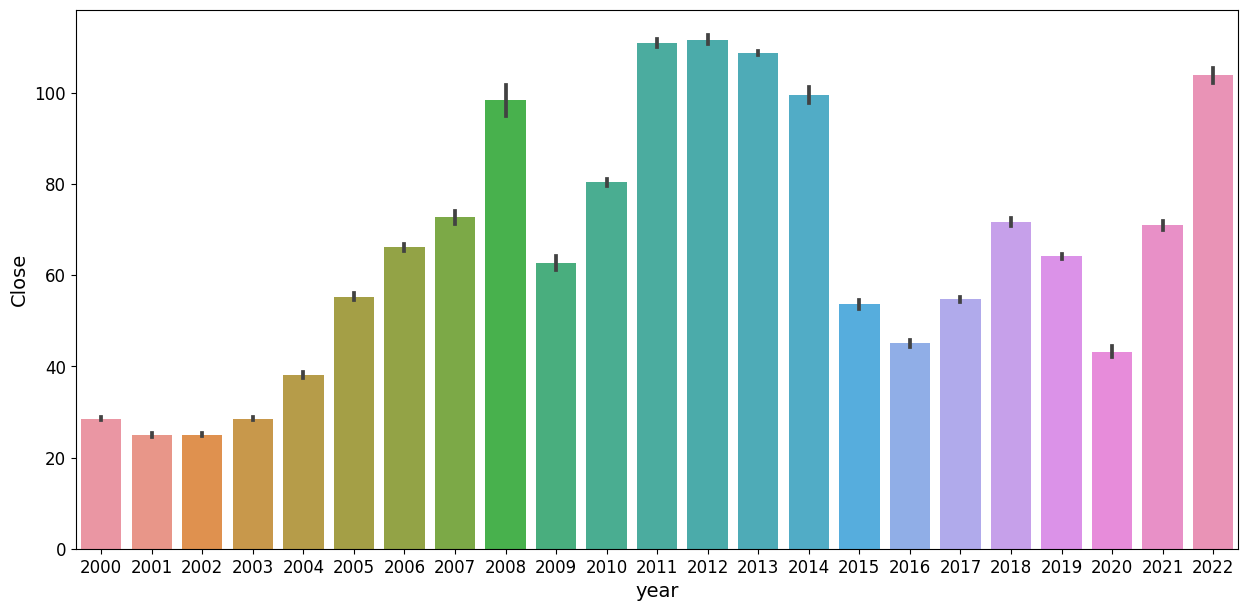

In [19]:
#Average close price of Brent oil by year
sns.barplot(x = 'year', y = 'Close', data = dataset)


From bar chart above, we can see that Brent oil prices were peaked in 2012 due to concerns about possible international supply disruptions. Besides, 2001 and 2002 saw the lowest oil prices because the world experienced a terrorist attack on September 11 2011

<AxesSubplot:xlabel='month', ylabel='Close'>

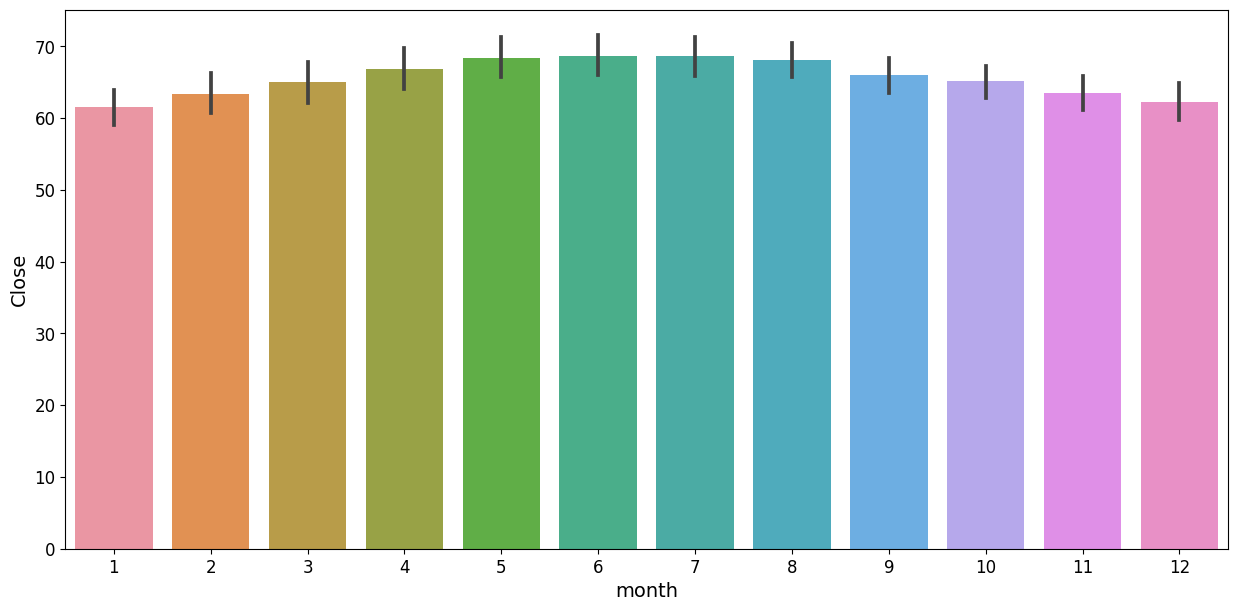

In [20]:
#Average close price of Brent oil by month
sns.barplot(x = 'month', y = 'Close', data = dataset)

#Brent oil prices appear to be highest in the month of June and lowest in the month of December

**Histogram**

We will plot histogram to check whether the dataset is left-skewed, right-skewed, or normally distributed

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

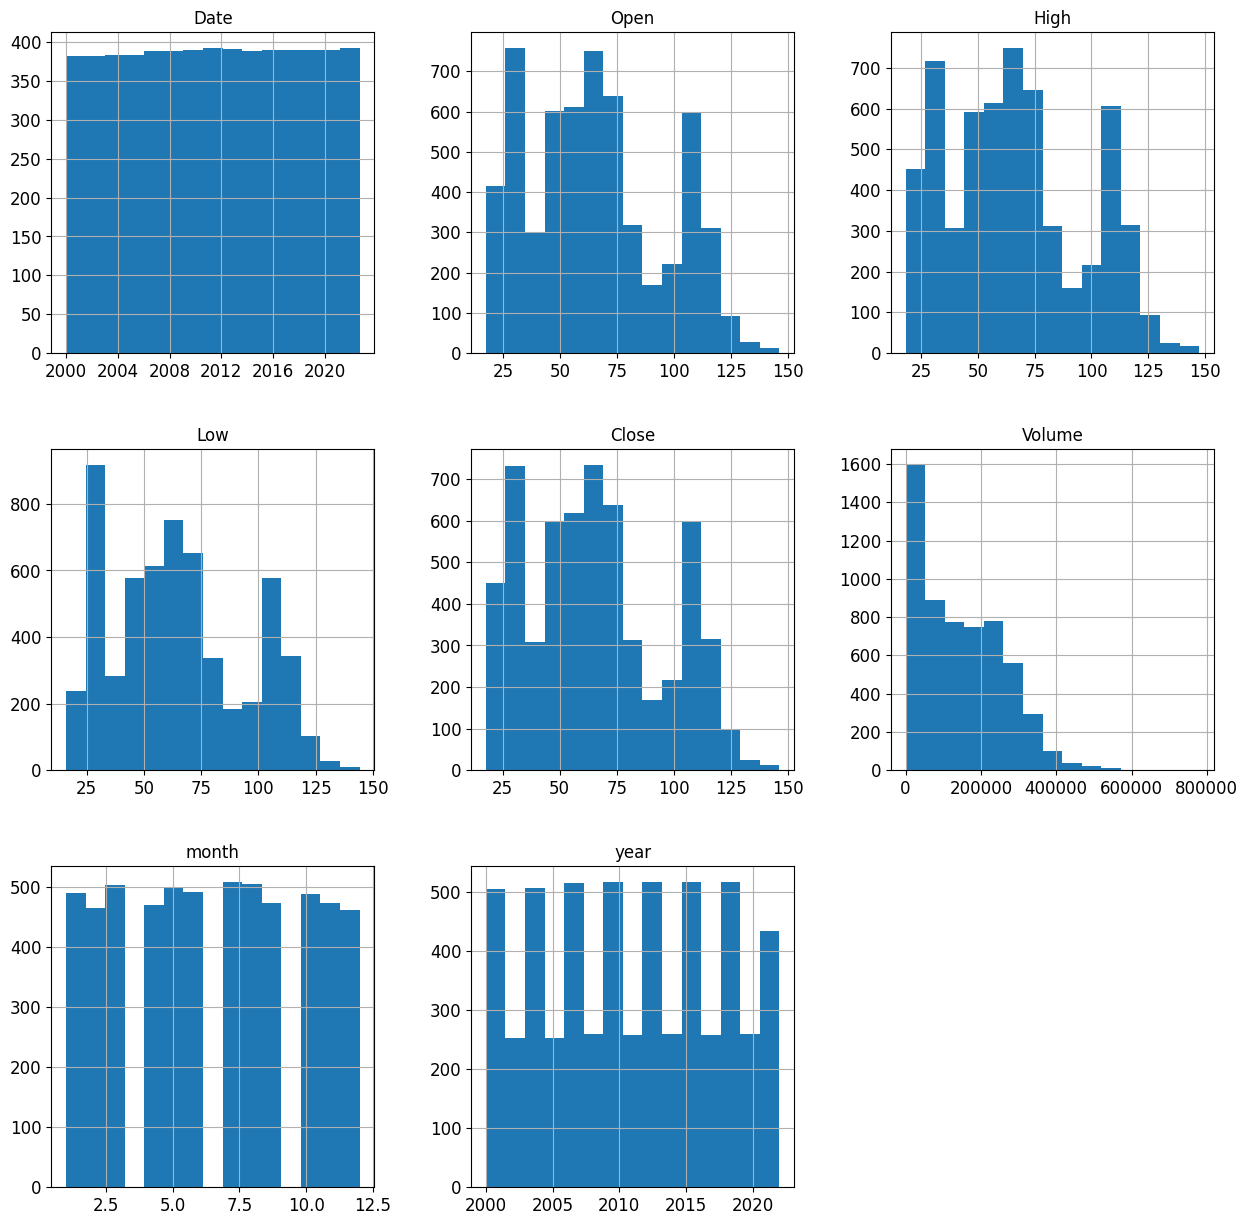

In [23]:
dataset.hist(layout=(3,3), figsize = (15,15), bins = 15 )

From the graphs above, we can see that most of data are normally distributed except for volume.

The best skew value for normally distributed data is very close to zero. So we use numPy log to make the skew value near to zero.

In [24]:
dataset.skew()

Open      0.349814
High      0.350108
Low       0.350211
Close     0.349419
Volume    0.717558
month     0.002841
year     -0.004309
dtype: float64

In [25]:
dataset['Volume'] = np.log1p(dataset['Volume'])

**Correlation Matrix**

Correlation matrix describes the strength of linear association between two quantitative variables. The value ranges from -1(negative correlated value) to +1 (Positive correlated value). The higher the value, the stronger the relation is and otherwise.

<AxesSubplot:title={'center':'Correlation Matrix'}>

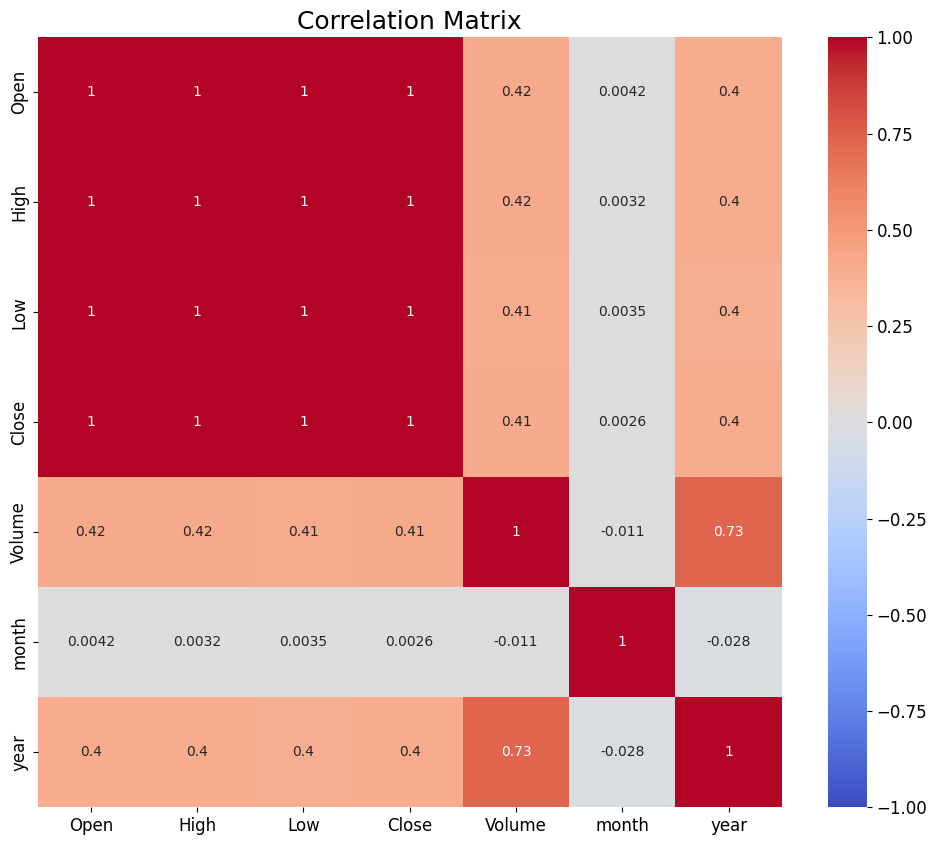

In [30]:
corr = dataset.corr()
f,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 10))
ax.set_title('Correlation Matrix', fontsize = 18)

sns.heatmap(corr, vmin = -1, vmax = 1, cmap= 'coolwarm', annot = True)

**Feature Engineering**

* To predict close price (dependent variable), we usepast-1-day performance of 5 original variables (Open, Close, High, Low, Volume) 
* It is interesting to look at historical price and volume over a period of time, such as past week, past month, or past year. Therefore, we create new variables by calculating average close prices and volumes over the past 5 days, past 21 days and past 252 days. Note that time window is not 7 days a week because oil is traded from 11pm Sundays to 10pm on Fridays.
* We can create new variables of volatility which can be reflected through standard deviation of close price and volume over the past 5 days, past 21 days and past 252 days

In [43]:
#create sub-finction for 4 original features
def create_lagged_feature(dataset, df):
    df['Date'] = dataset['Date']
    df['Close'] = dataset['Close']
    df['Open'] = dataset['Open']
    df['Open_1'] = dataset['Open'].shift(1)
    df['High_1'] = dataset['High'].shift(1)
    df['Low_1'] = dataset['Low'].shift(1)
    df['Close_1'] = dataset['Close'].shift(1)
    df['Volume_1'] = dataset['Volume'].shift(1)

#create sub-function for 3 features related to close price
def create_average_close_price(dataset, df):
    df['avg_close_5'] = dataset['Close'].rolling(window = 5).mean().shift(1)
    df['avg_close_21'] = dataset['Close'].rolling(window = 21).mean().shift(1)
    df['avg_close_252'] = dataset['Close'].rolling(window = 252).mean().shift(1)

#create sub-function for 3 features related to volume
def create_average_volume(dataset, df):
    df['avg_volume_5'] = dataset['Volume'].rolling(window = 5).mean().shift(1)
    df['avg_volume_21'] = dataset['Volume'].rolling(window = 21).mean().shift(1)
    df['avg_volume_252'] = dataset['Volume'].rolling(window = 252).mean().shift(1)

#create sub-function for 3 features related to standard deviation of close price
def create_std_close_price (dataset, df):
    df['std_close_5'] = dataset['Close'].rolling(window = 5).std().shift(1)
    df['std_close_21'] = dataset['Close'].rolling(window = 21).std().shift(1)
    df['std_close_252'] = dataset['Close'].rolling(window = 252).std().shift(1)

#create sub-function for 3 features related to standard deviation of volume
def create_std_volume(dataset, df):
    df['std_volume_5'] = dataset['Volume'].rolling(window = 5).std().shift(1)
    df['std_volume_21'] = dataset['Volume'].rolling(window = 21).std().shift(1)
    df['std_volume_252'] = dataset['Volume'].rolling(window = 252).std().shift(1)

#The main function to combine all the sub-functions
def create_features(dataset):
    df = pd.DataFrame()
    create_lagged_feature(dataset, df)
    create_average_close_price(dataset, df)
    create_average_volume(dataset, df)
    create_std_close_price(dataset, df)
    create_std_volume(dataset, df)
    return df


In [59]:
df = create_features(dataset)

In [60]:
#drop null values
df.dropna(inplace = True)

df.head(5)

,Date,Close,Open,Open_1,High_1,Low_1,Close_1,Volume_1,avg_close_5,avg_close_21,avg_close_252,avg_volume_5,avg_volume_21,avg_volume_252,std_close_5,std_close_21,std_close_252,std_volume_5,std_volume_21,std_volume_252
252,2001-01-02,24.30,24.40,23.15,24.15,23.02,23.87,9.719565,23.778,26.570952,28.530833,9.976249,10.129631,10.210750,0.175983,2.741529,3.041187,0.391199,0.493946,0.370652
253,2001-01-03,25.03,24.50,24.40,24.90,24.20,24.30,10.135155,23.916,26.171905,28.530476,9.902673,10.113394,10.209741,0.261209,2.395958,3.041680,0.288455,0.487549,0.370510
254,2001-01-04,25.35,25.09,24.50,25.30,24.20,25.03,10.502297,24.190,25.845714,28.535635,10.106312,10.112799,10.210468,0.517929,2.016178,3.034600,0.278310,0.487041,0.370905
255,2001-01-05,25.18,25.40,25.09,25.85,24.77,25.35,10.398367,24.452,25.616190,28.542500,10.162378,10.112456,10.209243,0.716394,1.756979,3.025378,0.307924,0.486828,0.369767
256,2001-01-08,24.43,25.33,25.40,26.02,25.15,25.18,10.462789,24.746,25.418095,28.550794,10.243634,10.107736,10.209262,0.632479,1.536862,3.013212,0.326073,0.482715,0.369780


In [61]:
#range of dates in the dataset
df['Date'].min(), df['Date'].max()

(Timestamp('2001-01-02 00:00:00'), Timestamp('2022-09-02 00:00:00'))

**Train - Test Split**

After deleting the null values, we will split data into train and test set. The train set will contain data from 
02/01/2001 to 01/01/2018 and test set will contain data from 01/01/2018 to 02/09/2022.

In [62]:
#separate out different features into categories
target_var = ['Close']
predictors = ['Open', 'Open_1', 'High_1', 'Low_1', 'Close_1', 'Volume_1', 
    'avg_close_5', 'avg_close_21', 'avg_close_252', 'avg_volume_5', 'avg_volume_21', 
    'avg_volume_252', 'std_close_5', 'std_close_21', 'std_close_252', 'std_volume_5', 
    'std_volume_21', 'std_volume_252']

In [65]:
#Split data into train and test set (80:20)
df_train = df[df['Date'] < '2018-01-01']
X_train = df_train[predictors].values
y_train = df_train[target_var].values

df_test = df[df['Date'] >= '2018-01-01']
X_test = df_test[predictors].values
y_test = df_test[target_var].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4362, 18) (4362, 1) (1208, 18) (1208, 1)


In [66]:
np.mean(y_train), np.mean(y_test)

(67.04422971114168, 68.44469370860928)

**Making Prediction**

We use pipeline to stick multiple processes into a single scikit-learn estimator. Pipeline helps to assemble several steps together and to create convenient workflow for data processing. 

In this case, we will use pipeline to standardize the data before fitting it into different models.StandardScaler is a preprocessing technique that scales features to have a mean of 0 and a standard deviation of 1 (i.e., it applies Z-score normalization). It allows models that are sensitive to the magnitude of the input features to perform better.

In [70]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Linear Regression Model**

In [72]:
pipe_LR = Pipeline([('Scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_LR.fit(X_train,y_train)
y_pred_LR = pipe_LR.predict(X_test)
print("R2: {}".format(r2_score(y_test, y_pred_LR)))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred_LR)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred_LR)))

R2: 0.9927850544475355
MAE: 1.0801415691818683
MSE: 2.8195699334768274


**Random Forest Model**

In [ ]:
#tune hyperparameters for Random Forest Regressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [40,60,80],
    'criterion' :['mse', 'mae'],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(n_jobs= 4)
grid_search = GridSearchCV(rf,param_grid, cv = 5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_

In [ ]:
#Use best parameters to forecast test data
pipe_RF = Pipeline([('scaler', StandardScaler()),('rf', RandomForestRegressor(best_params))])
pipe_RF.fit(X_train, y_train)
y_pred_RF = pipe_RF.predict(X_test)
print("R2: {}".format(r2_score(y_test, y_pred_RF)))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred_RF)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred_RF)))

R2: 0.9923330884688598
MAE: 1.1864065397351002
MSE: 2.996196309263249


Text(0, 0.5, 'Features')

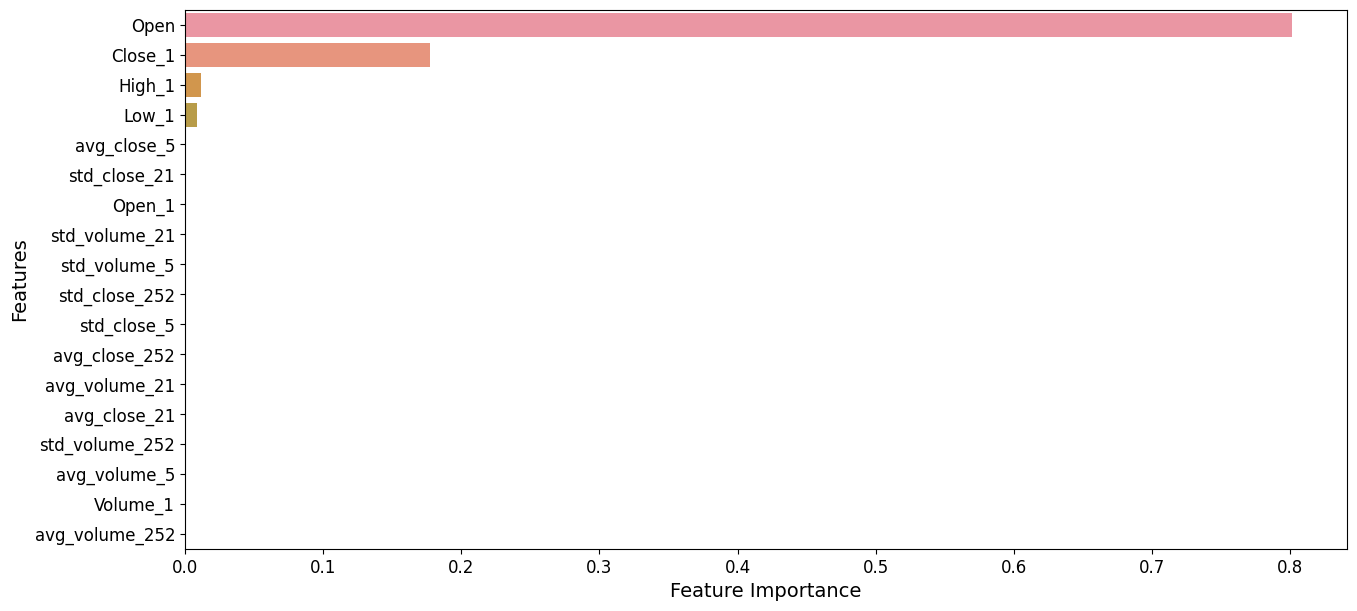

In [86]:
#Feature importance in Random Forest model
#importances = pipe_RF.steps[1][1].feature_importances_
Feature_Importance_RF = pd.DataFrame(pipe_RF.steps[1][1].feature_importances_, index = predictors, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending=False).reset_index()

sns.barplot(x = 'Feature Importance', y = 'index', data = Feature_Importance_RF)
plt.ylabel('Features')


**XGB Regressor Model**

In [88]:
pipe_XGB = Pipeline([('scaler', StandardScaler()),('xgb', XGBRegressor())])
pipe_XGB.fit(X_train, y_train)
y_pred_XGB = pipe_XGB.predict(X_test)
print("R2: {}".format(r2_score(y_pred_XGB, y_test)))
print("MAE: {}".format(mean_absolute_error(y_pred_XGB, y_test)))
print("MSE: {}".format(mean_squared_error(y_pred_XGB, y_test)))

R2: 0.9877964096963484
MAE: 1.5604006842430063
MSE: 4.569936010772535


Text(0, 0.5, 'Features')

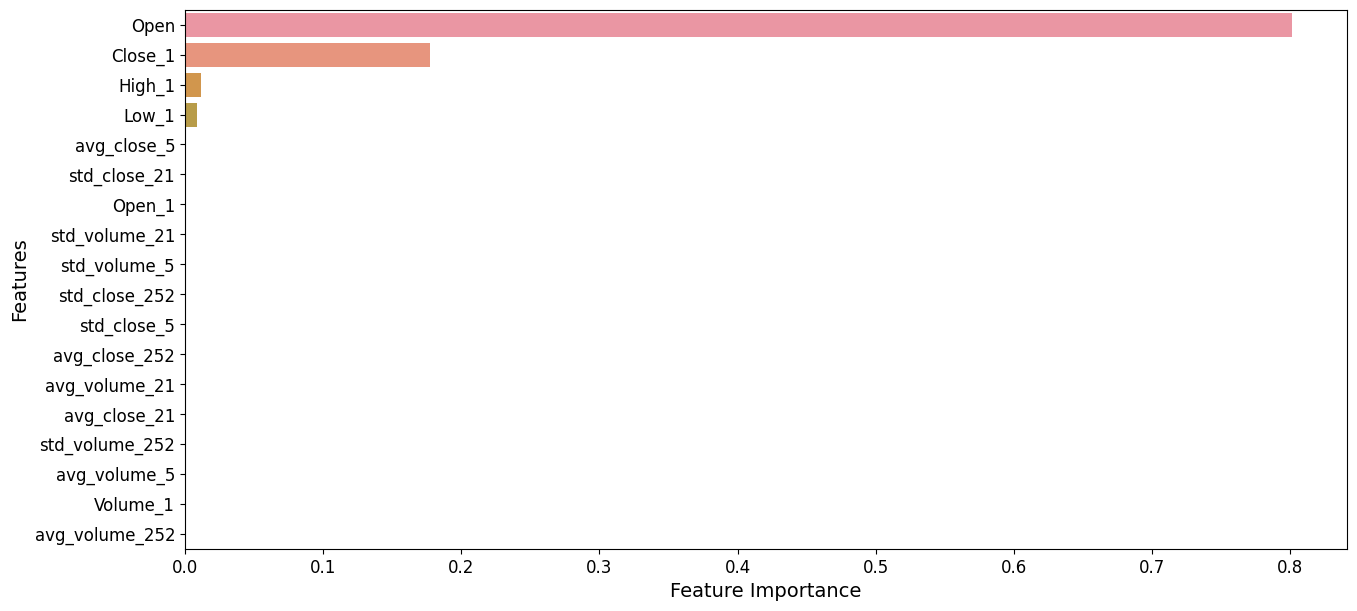

In [92]:
#Feature importance in XGBoost model
Feature_Importance_XGB = pd.DataFrame(pipe_XGB['xgb'].feature_importances_, index = predictors,
                columns=['Feature Importance']).sort_values('Feature Importance', ascending=False).reset_index()
sns.barplot(x = 'Feature Importance', y = 'index', data = Feature_Importance_RF)
plt.ylabel('Features')

**ARIMA Model (Auto-Regressive Integrated Moving Average)**

ARIMA, a general class of statistical models for time series analysis forecasting, is used to measure events that happen over a period of time. ARIMA models use a time series's past values and errors to forecast future values.

In this project, we build ARIMA model to predict Brent Oil prices. Because our dataset is time-series, we need to check whether our dataset looks like white noise or random walk. Besides, our dataset should be stationary to be forecasted.

A time series is classified as white noise if it satisfies conditions as follows:
* Average value (mean) is zero
* Standard deviation is constant
* The correlation between current value and previous value is insignificant

A time series is stationary when it has no trend, no seasonal pattern but a constant variance and constant autocorrelation pattern. It is strongly stationary if the distribution of a time series is same through time. We can check stationarity of time-series by using Augmented Dickey-Fuller test (ADFuller)

An ARIMA model is characterized by 3 terms: p, d, q
* p is the parameter associated with the auto-regressive (AR) model where the dependent variable depends on past values of itself
* d is the number of differencing to make the time-series stationary
* q is the parameter associated with the moving avergae (MA) model where the dependent variable depends on terms of residual error


In [100]:
# Create new dataframe with only 2 columns - Date and Close
df_arima = dataset.copy()
df_arima.set_index('Date', inplace = True)
df_arima= df_arima[['Close']]

#Get weekly average close price
df_arima = df_arima.resample('W').mean()

In [101]:
df_arima.describe()

,Close
count,1183.000000
mean,65.450228
std,29.499195
min,18.092000
25%,42.608000
50%,62.504000
75%,85.018000
max,143.052000


<AxesSubplot:xlabel='Date'>

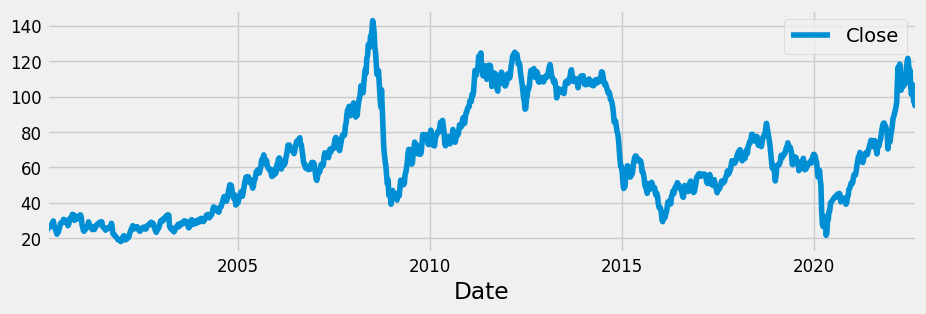

In [104]:
plt.rcParams['figure.figsize'] = (10, 3)
df_arima.plot()

In [108]:
#check if data is white noise using Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df_arima, lags = 1)

# a pvalue is less than 0.05, so we reject the null hypothesis that the data is white noise

,lb_stat,lb_pvalue
1,1174.108301,2.584275e-257


In [115]:
#Check stationarity using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_arima.Close)

if result[0] > result[4]['5%'] and result[1] > 0.05:
    print('Data is not stationary')
else:
    print('Data is stationary')

Data is not stationary


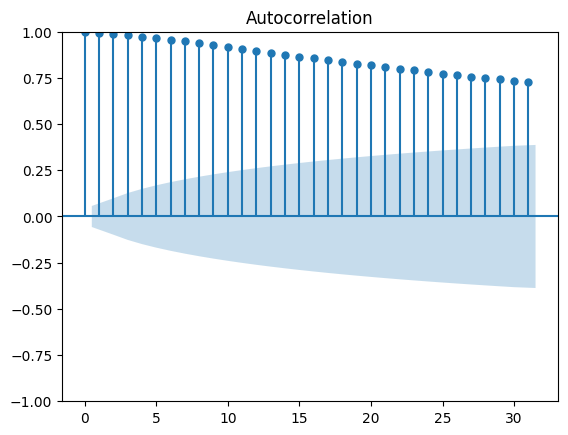

In [117]:
#Auto-correlation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('default')
plot_acf(df_arima)

The figure above shows the resulting ACF plot. According to he figure, all lags are marginally outside the shaded area. We can conclude that the data is non-random and not stationary.

Optimal parameters for ARIMA model

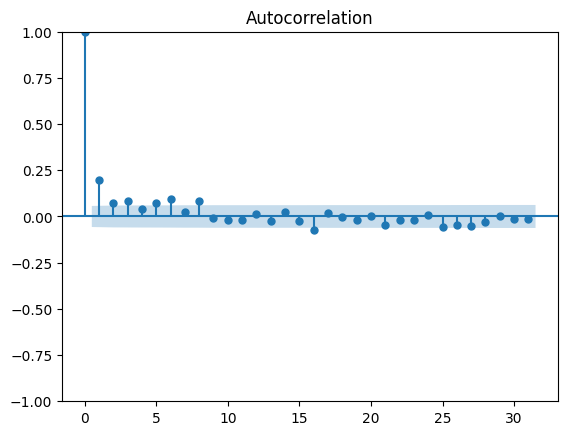

In [124]:
# find 'd' parameter (order of differencing)
#1st order differncing
plot_acf(df_arima.Close.diff().dropna())


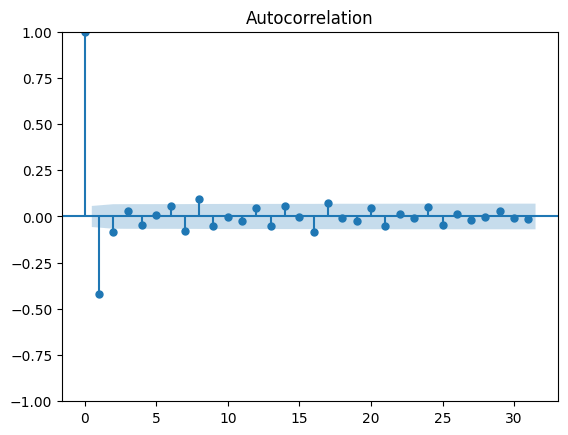

In [126]:
#2st order differncing
plot_acf(df_arima.Close.diff().diff().dropna())

From above plots we can see that the data reaches stationary with one order of differencing ( d = 1)

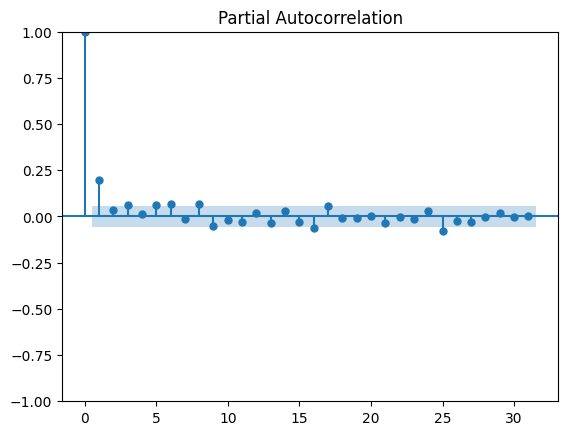

In [127]:
# find 'p' parameter (order of AR)
plot_pacf(df_arima.Close.diff().dropna())

We can observe that the PACF has a large spike at lag 0 and 1. Then we will choose p as 1

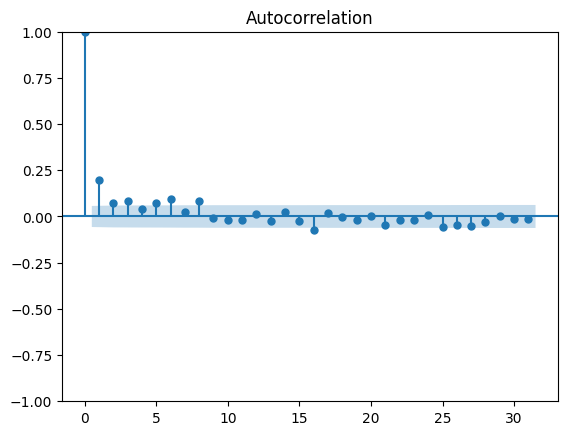

In [128]:
# find 'q' parameter (order of MA)
plot_acf(df_arima.Close.diff().dropna())

As the correlation of lags at 0 and 1 are quite significant, we choose q as 1

**BUILD ARIMA MODEL**

In time series modelling, the predict can be less accurate over time. To make better forecast, we can use walk-forward validation which is more realistic approach to re-train the model with actual data for further predictions. 

In [129]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [147]:
order = (1,1,1)
X = df_arima.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for i in range(len(test)):
        model = ARIMA(history, order= order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[i]
        history.append(obs)

In [149]:
print("R2: {}".format(r2_score(predictions, test)))
print("MAE: {}".format(mean_absolute_error(predictions, test)))
print("MSE: {}".format(mean_squared_error(predictions, test)))

R2: 0.9755839667583437
MAE: 1.9534986739749967
MSE: 8.05919071636052


**EVALUATE MODEL PERFORMANCE**

Based on three metrics (R2, MAE, MSE), linear regression model is better than other models with higher R-squared and lower error (MAE, MSE). Therefore, it is a good idea to use this model to predict Brent Oil Price in the future.